In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(None)

In [276]:
a, b, n = 0, 0.7, 50

mu = 0
sigma = 0.05

#f = np.vectorize(lambda x: 0.3*(1 + np.math.sin(x)))
f = np.vectorize(lambda x: x)
rands = np.random.normal(mu, sigma, size=n)

In [260]:
class OneLayerPerceptron:
    def __init__(self, alpha, hid_layer):
        self.alpha = alpha
        self.act_f = np.vectorize(lambda s: 1.0/(1+np.math.exp(-2.0*alpha*s)))
        
        self.w_hid = np.random.rand(hid_layer)
        self.w_last = np.random.rand(hid_layer)
    
    def fit(self, test_inputs, test_outputs, epoches, step, inert):
        self.epoches = epoches
        self.delta_w_last = 0
        self.delta_w_hid = 0
        
        for epoch in range(self.epoches):
            err = 0.0
            for t_inp, t_outp in zip(test_inputs, test_outputs):
                outp = self.predict(t_inp)
                err += np.linalg.norm(outp - t_outp)
                
                delta_last = -outp*(1 - outp)*(t_outp - outp)
                delta_hid = self.outps_hid*(1 - self.outps_hid)*delta_last*self.w_last
                
                self.delta_w_last = inert*self.delta_w_last + (1 - inert)*step*delta_last*self.outps_hid
                self.delta_w_hid  = inert*self.delta_w_hid + (1 - inert)*step*delta_hid*t_inp
                
                self.w_last += self.delta_w_last
                self.w_hid += self.delta_w_hid            
                
        print "Epoch {}, Error = {}".format(epoch, err)
    
    def predict(self, x):
        self.outps_hid = self.act_f(x*self.w_hid)
        return (np.sum(self.outps_hid * self.w_last))

Epoch 99, Error = 33.4441561185


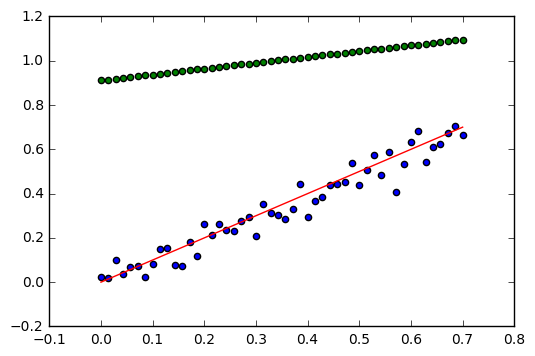

In [277]:
test_inp  = np.linspace(a, b, n)
test_outp = f(test_inp) + rands

nn = OneLayerPerceptron(1, 50)
nn.fit(test_inp, test_outp, 100, 1e-4, 0.5)

x_bins = np.linspace(a, b, n)
plt.plot(x_bins, f(x_bins), c='r')
plt.scatter(x_bins, f(x_bins)+rands)
plt.scatter(x_bins, np.array([nn.predict(x) for x in x_bins]), c='g')
plt.show()